
# Lab | Classification, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Round 1
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
  
Roun2: 


Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.

- Import the required libraries and modules that you would need.


In [2]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

- Read that data into Python and call the dataframe `churnData`.


In [3]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


- Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#There is white space so I put nan instead 
churnData = churnData.replace('^\s*$',np.nan, regex = True)

In [6]:

churnData[['TotalCharges']] = churnData[['TotalCharges']].apply(pd.to_numeric)


In [7]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Check for null values in the dataframe. Replace the null values.


In [8]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

In [10]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

change Churn into numerical 

In [12]:
churnData['Churn'] = churnData['Churn'].replace(('Yes', 'No'),(1,0))

In [13]:
churnData['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [14]:
y = churnData['Churn']
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [15]:
#y = y.apply(lambda x : 1 if x==0 else 0) ##maybe I don't have to do that because when I change to numerical, yes is 1


In [15]:
#let's split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

/Users/valeludelgado/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/valeludelgado/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'for depth= 1'

,Error_metric,Train,Test
0,Accuracy,0.737323,0.728348
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


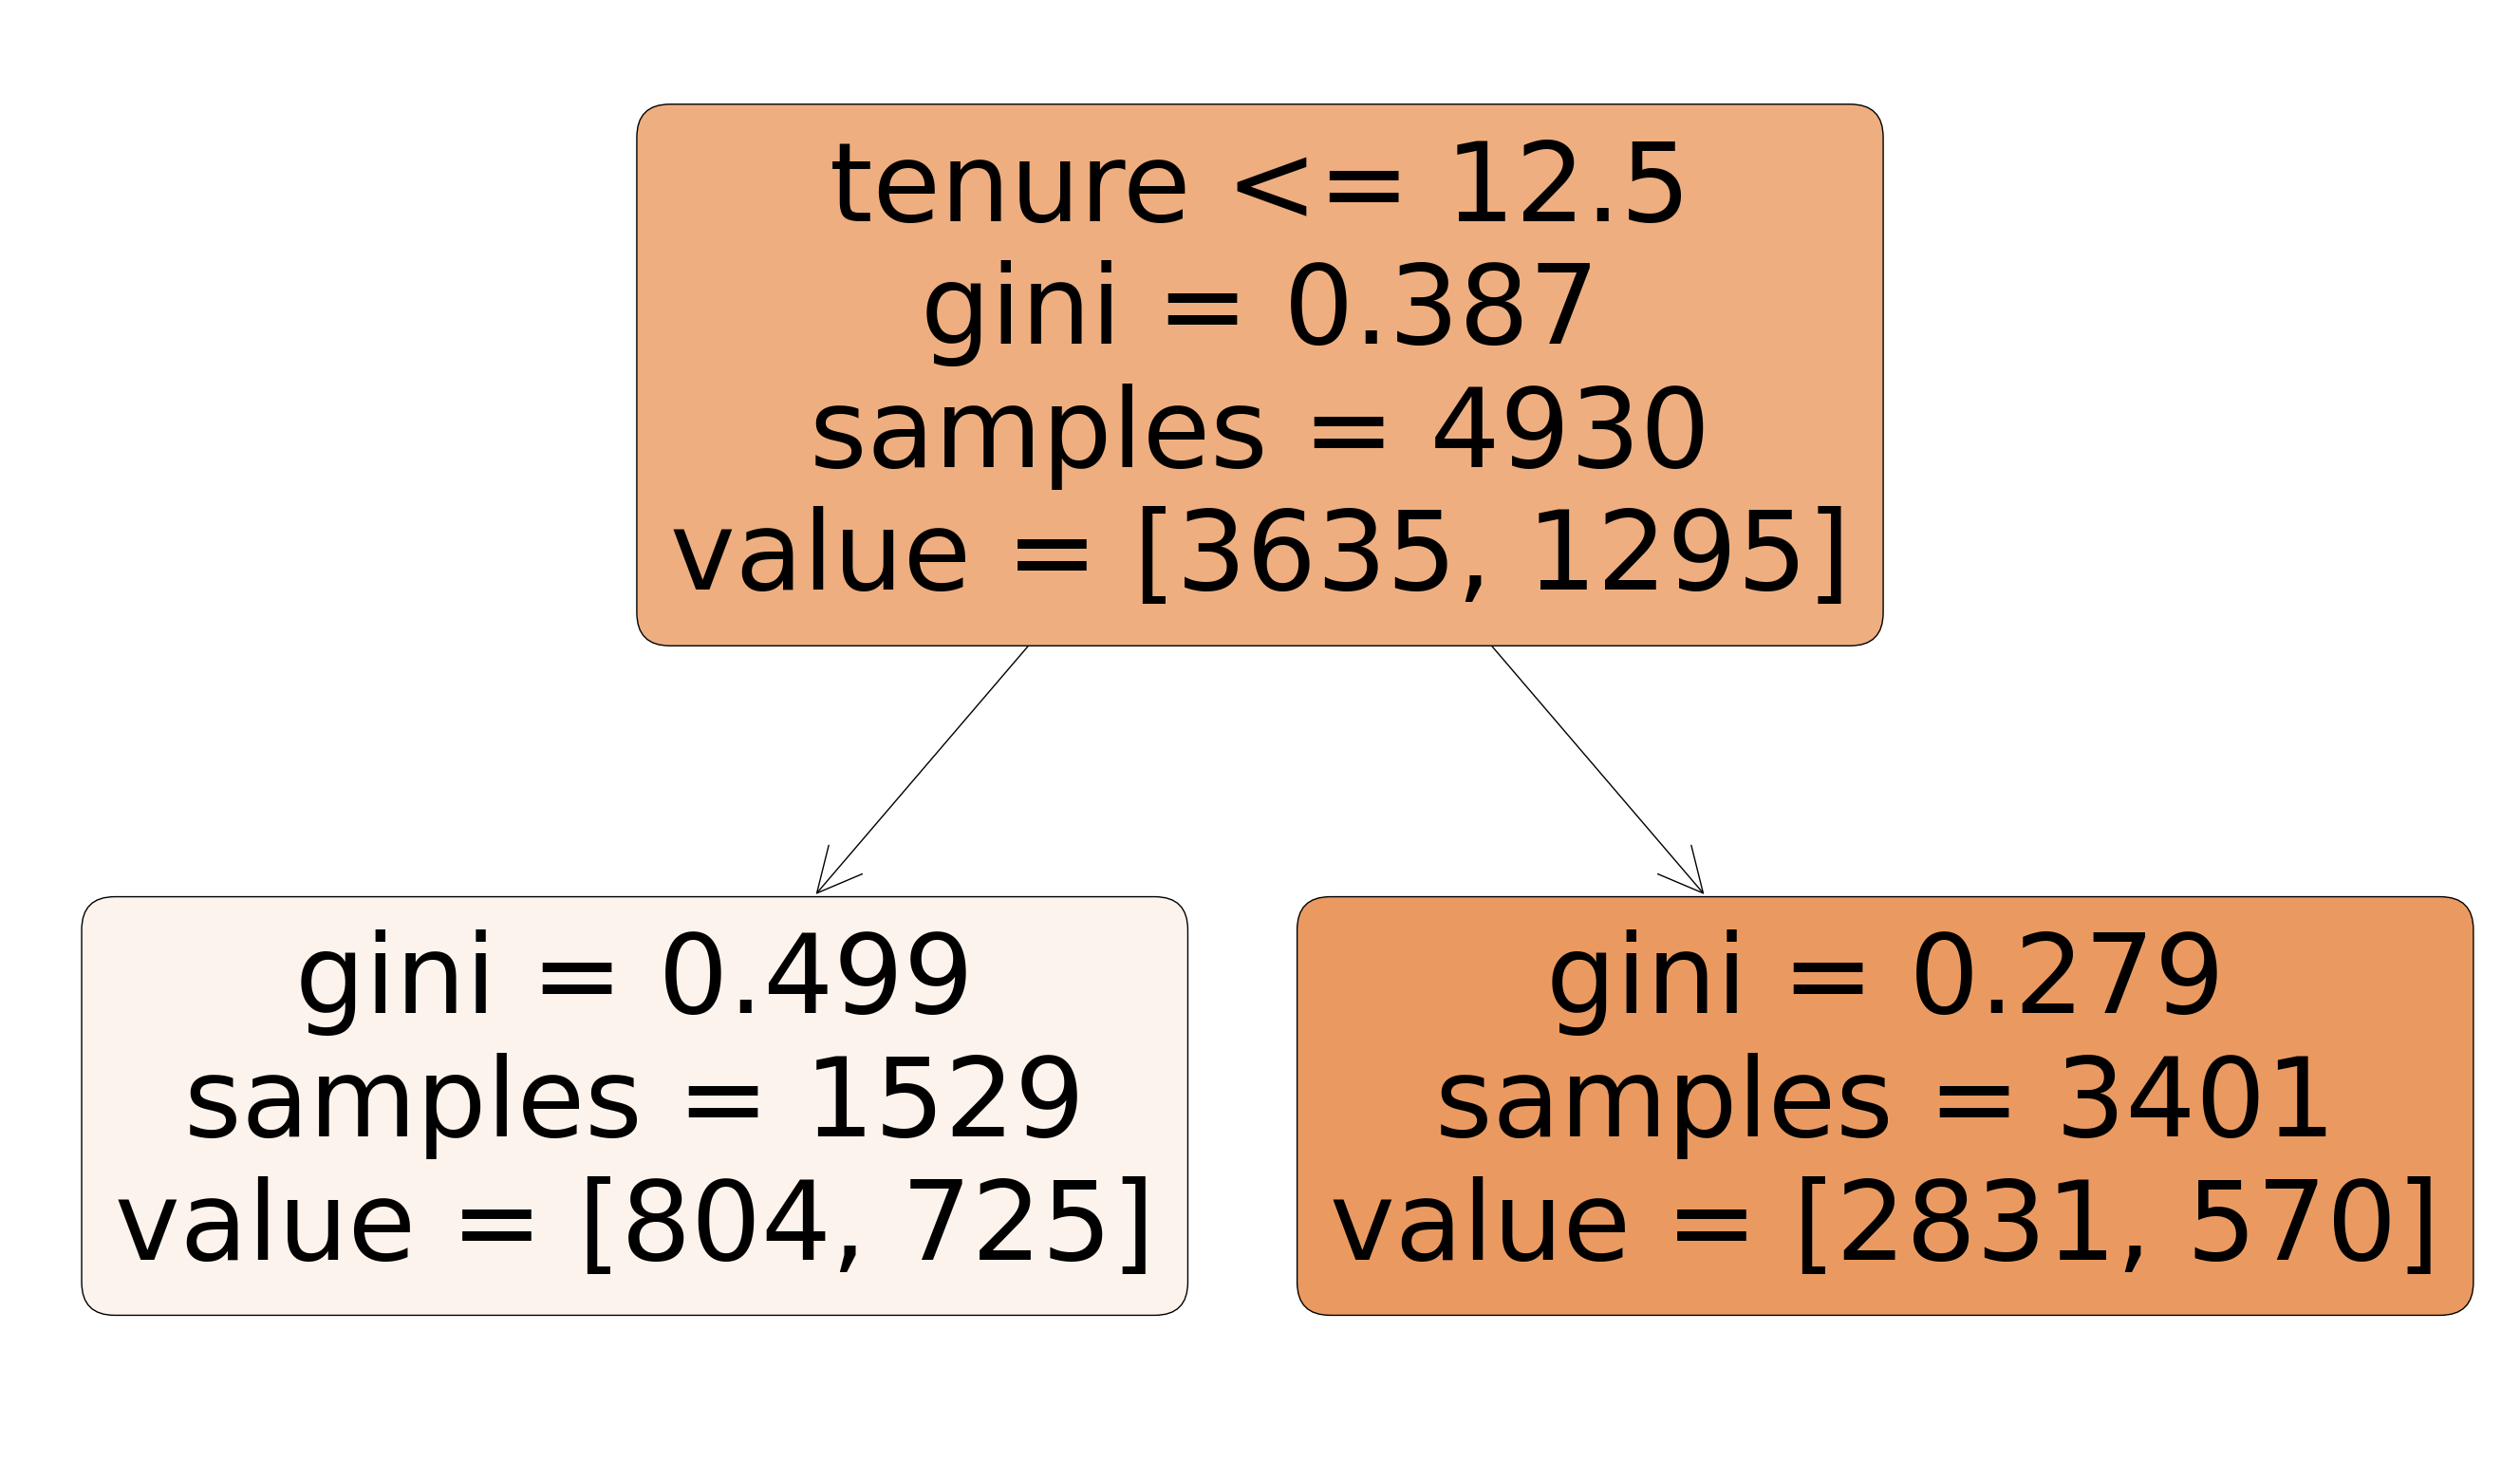

'for depth= 2'

,Error_metric,Train,Test
0,Accuracy,0.786410,0.774255
1,Precision,0.676901,0.661130
2,Recall,0.357529,0.346690


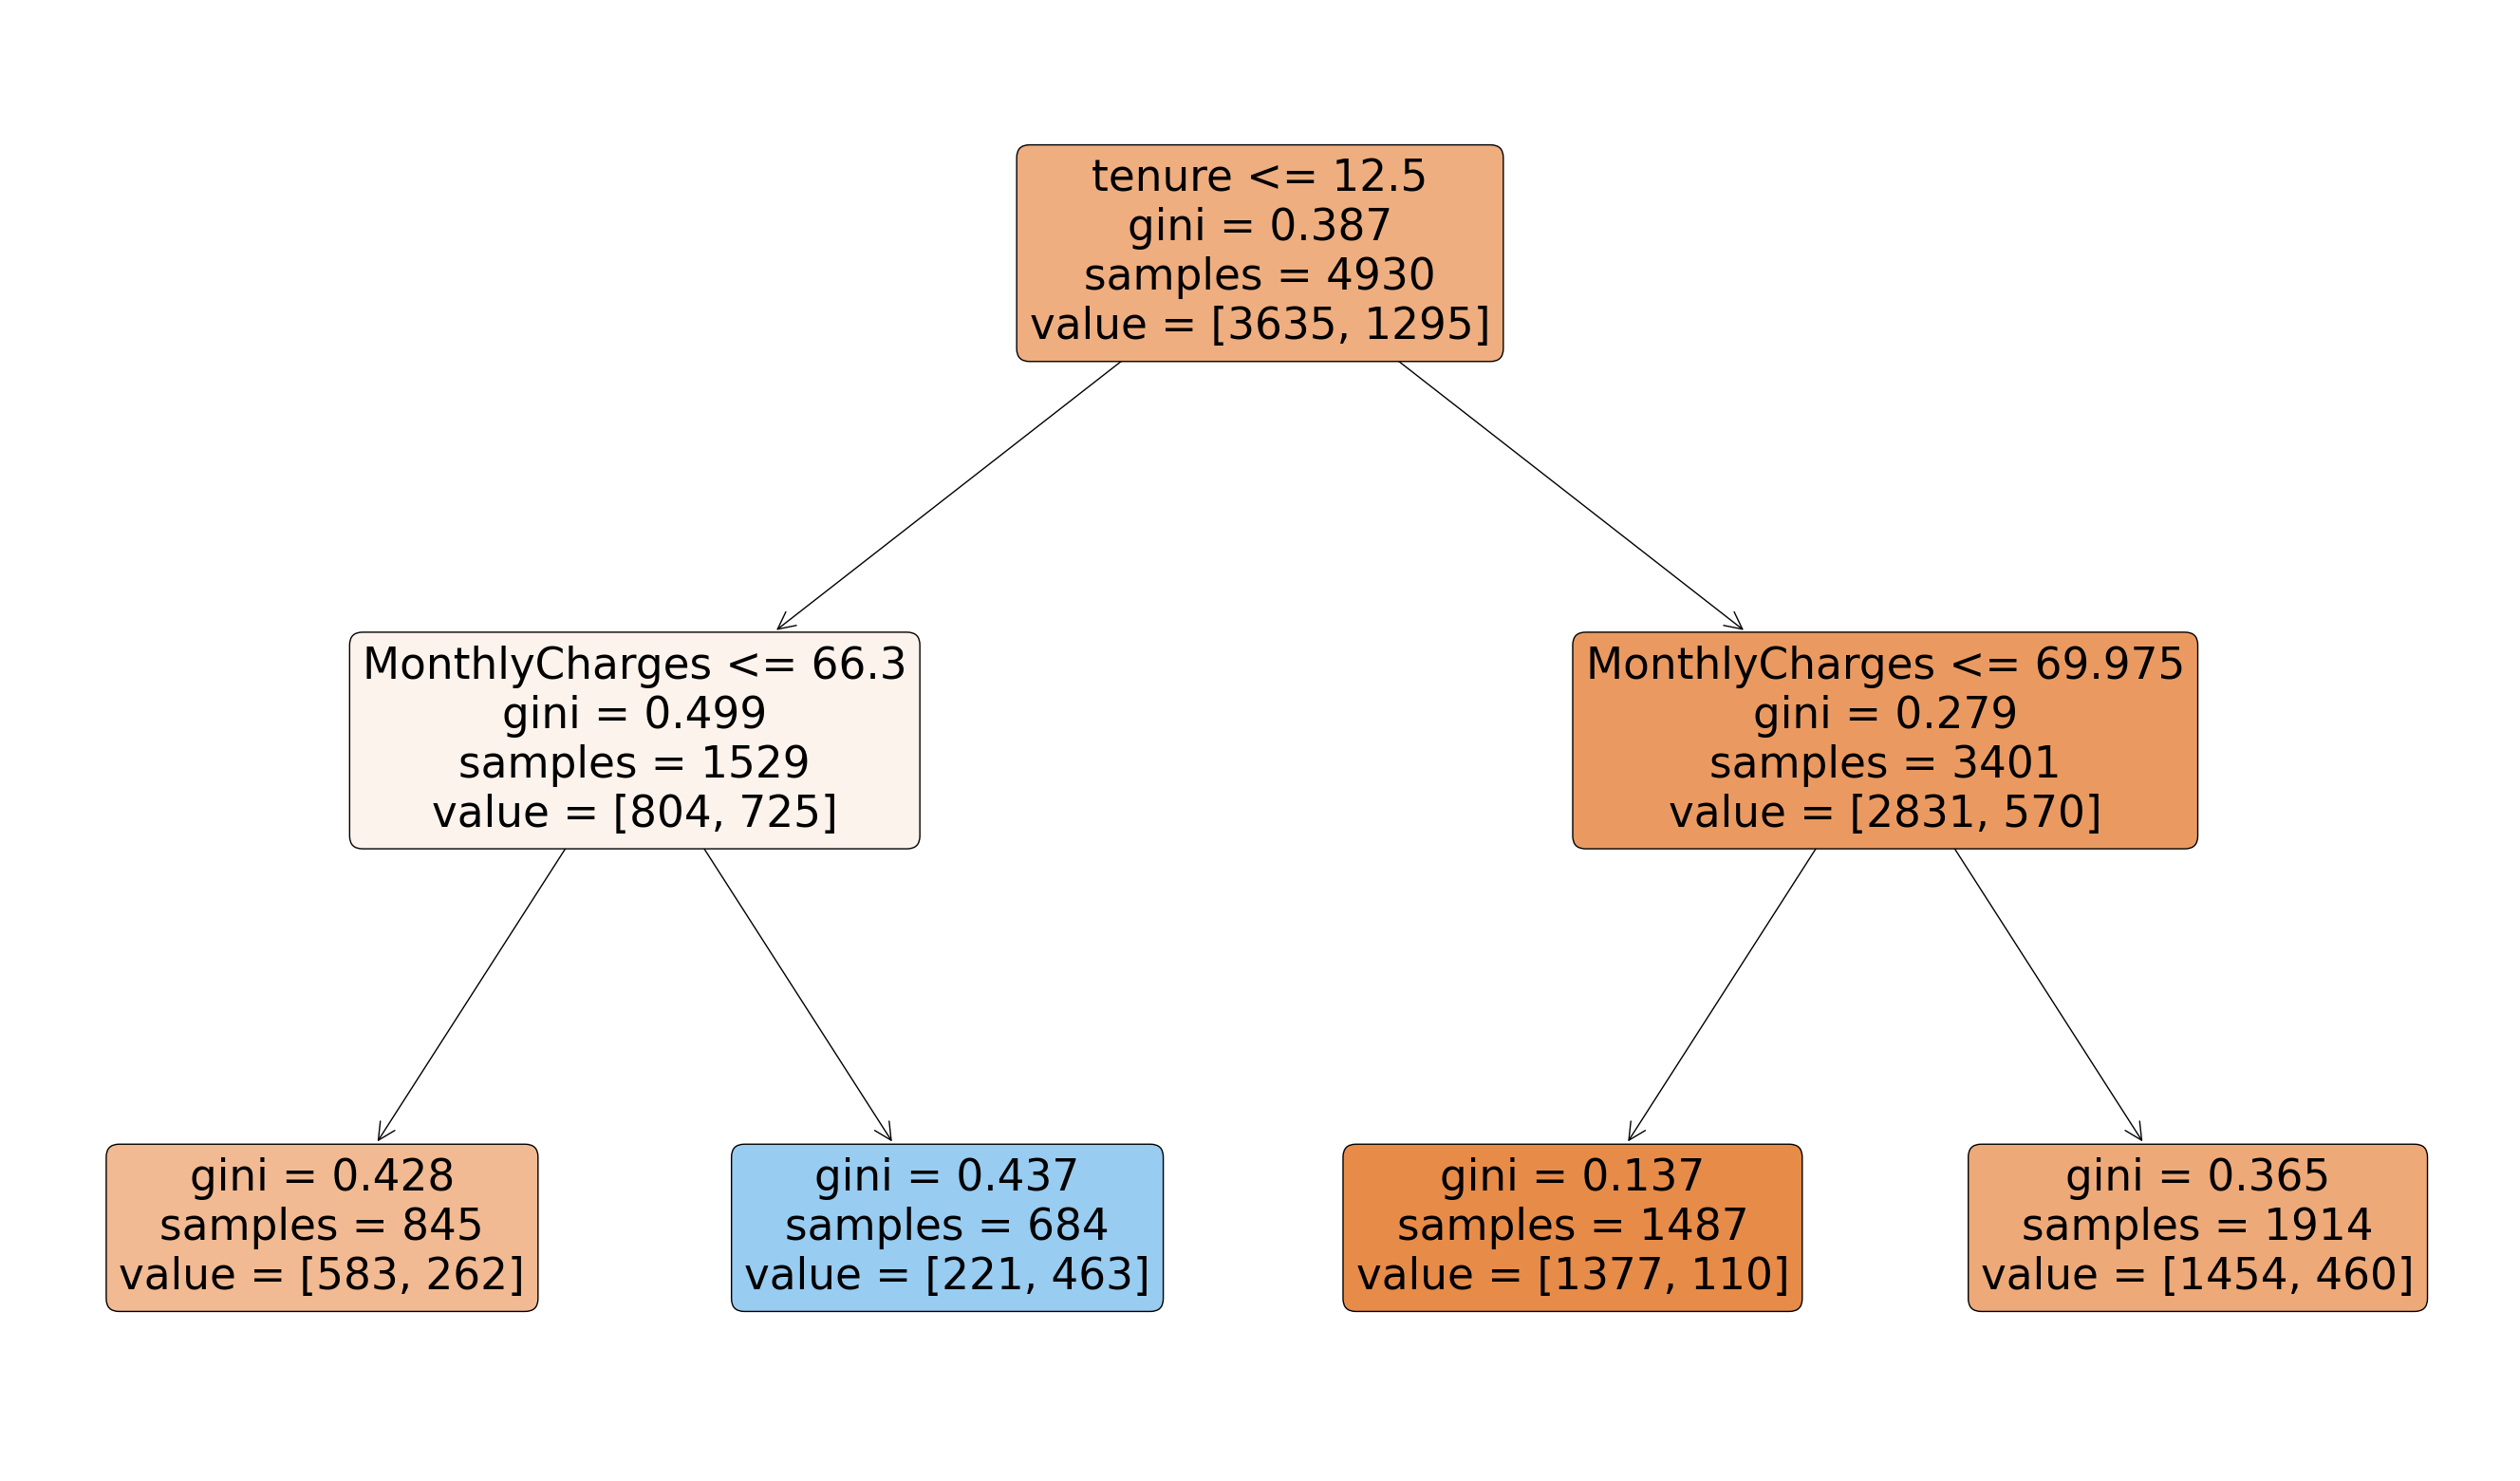

'for depth= 3'

,Error_metric,Train,Test
0,Accuracy,0.786410,0.774255
1,Precision,0.676901,0.661130
2,Recall,0.357529,0.346690


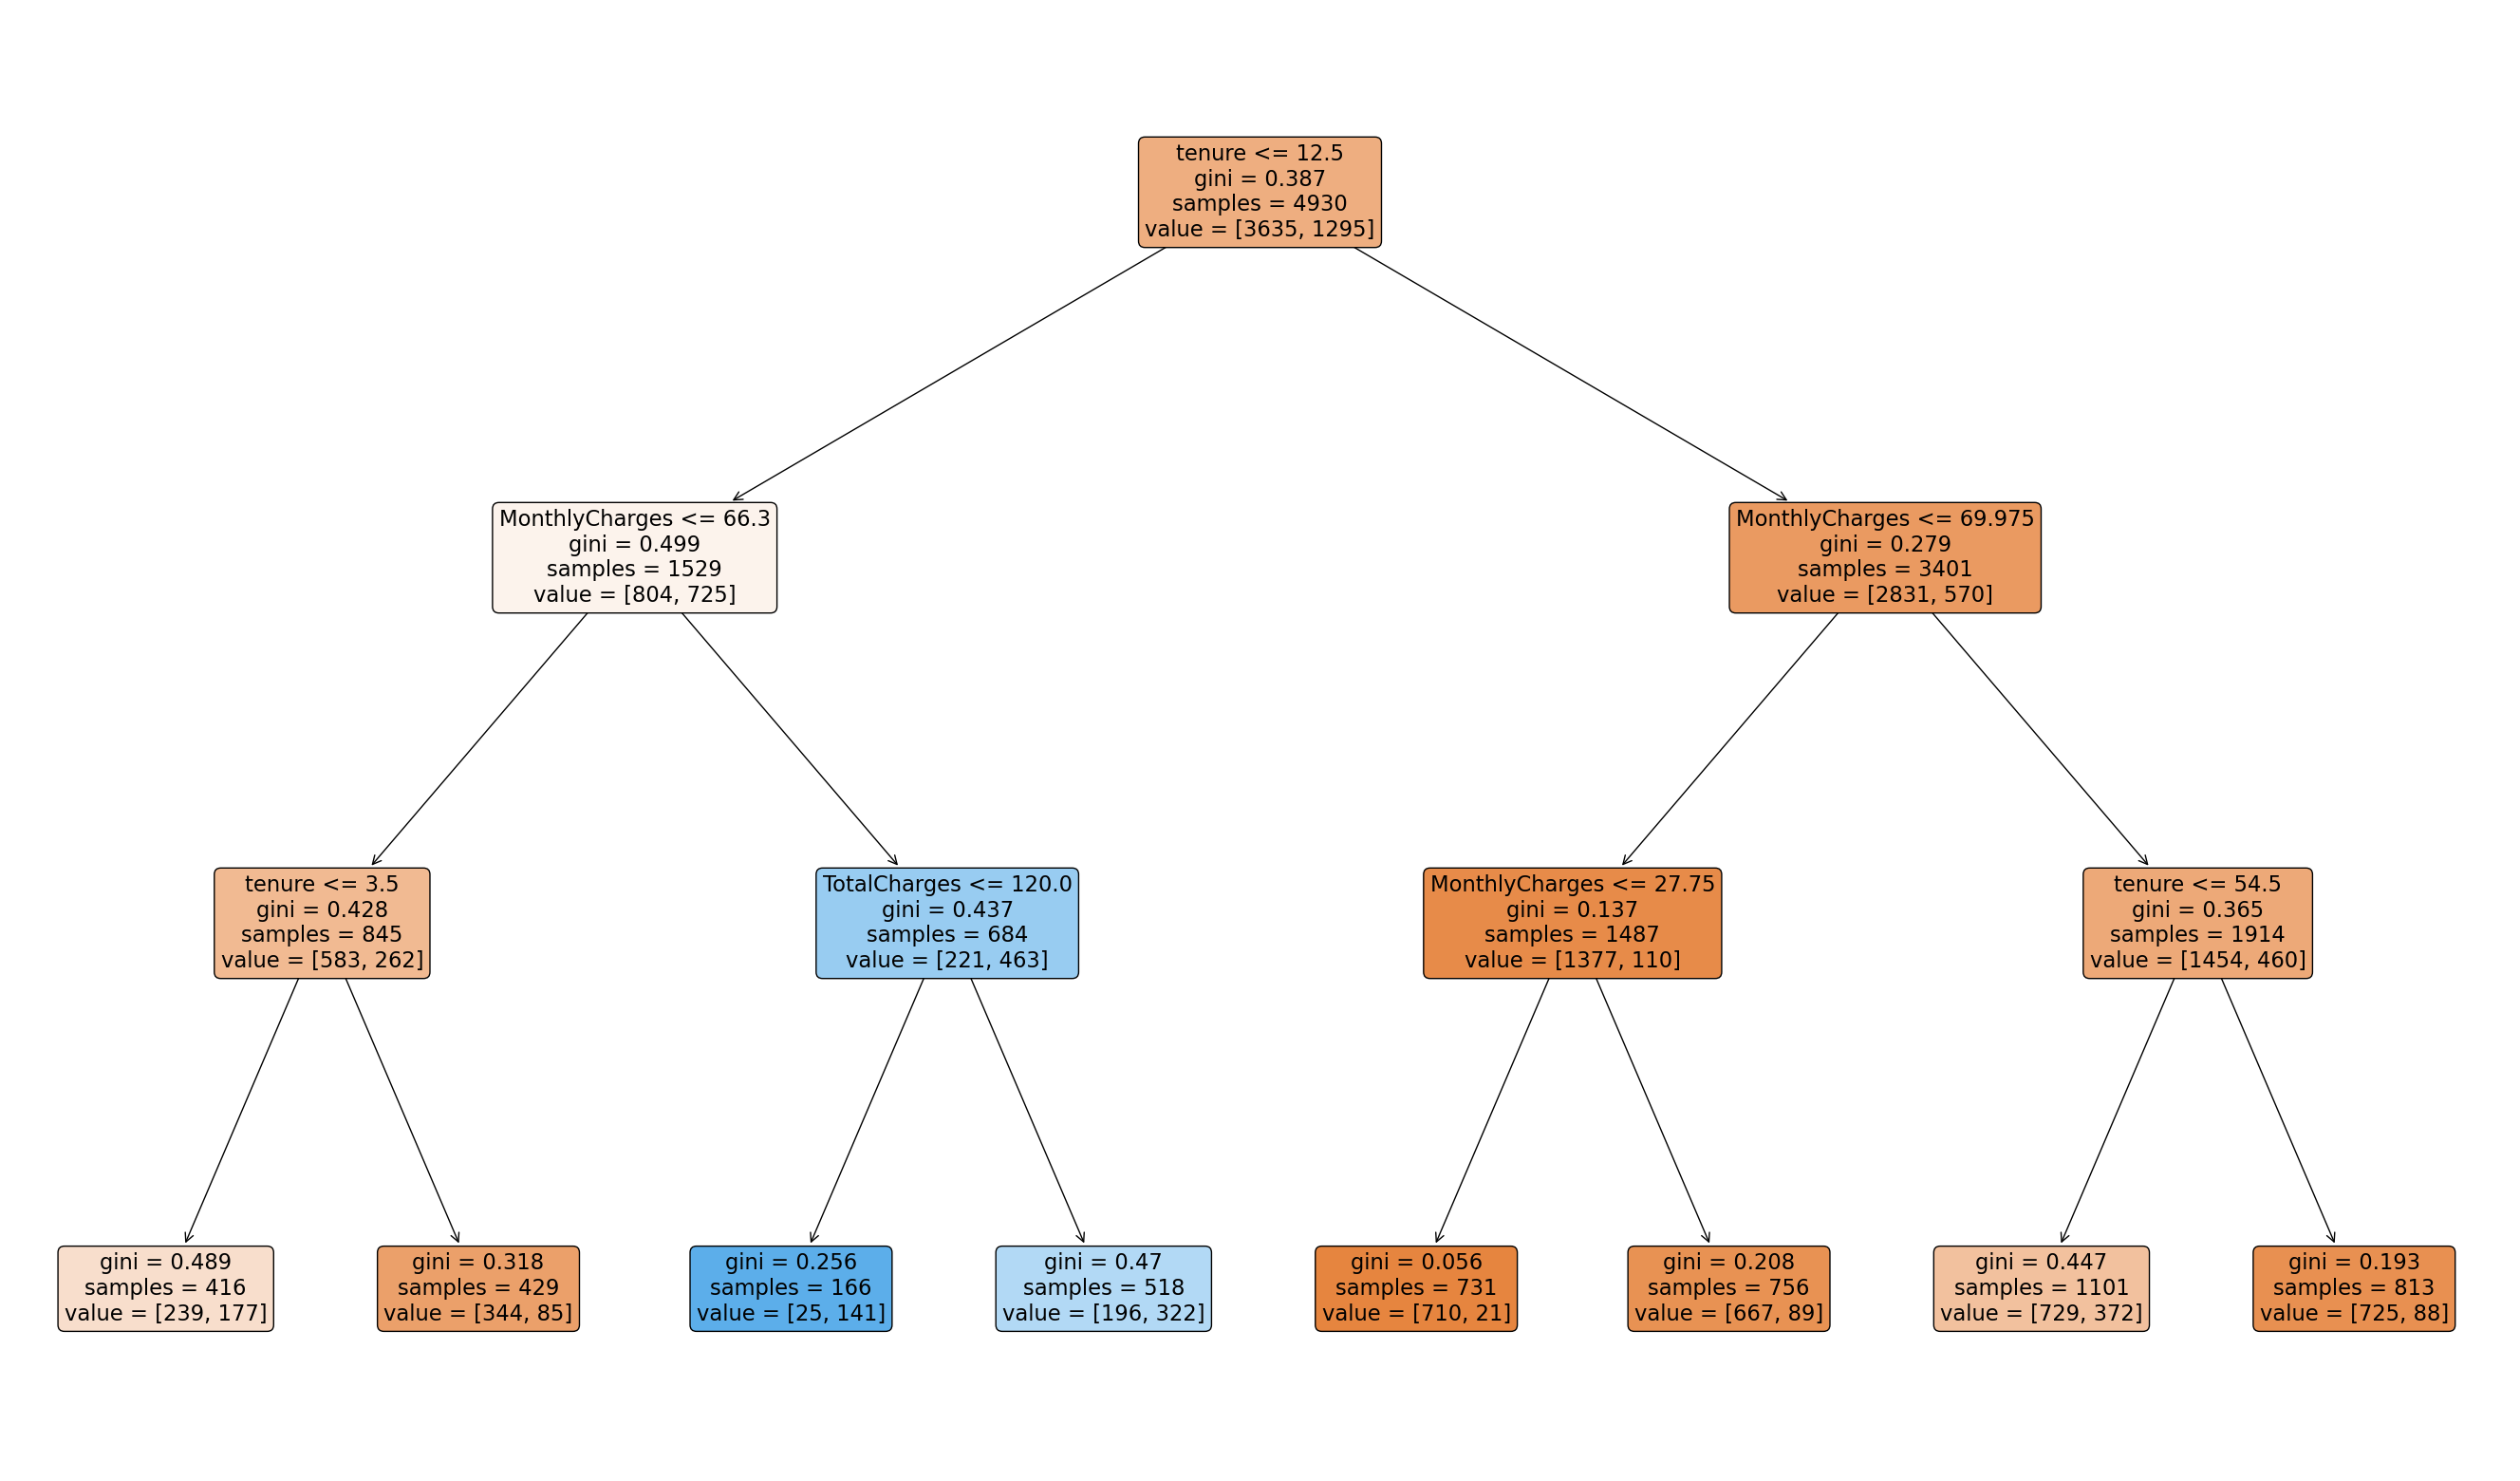

'for depth= 4'

,Error_metric,Train,Test
0,Accuracy,0.788438,0.777094
1,Precision,0.633758,0.623501
2,Recall,0.461004,0.452962


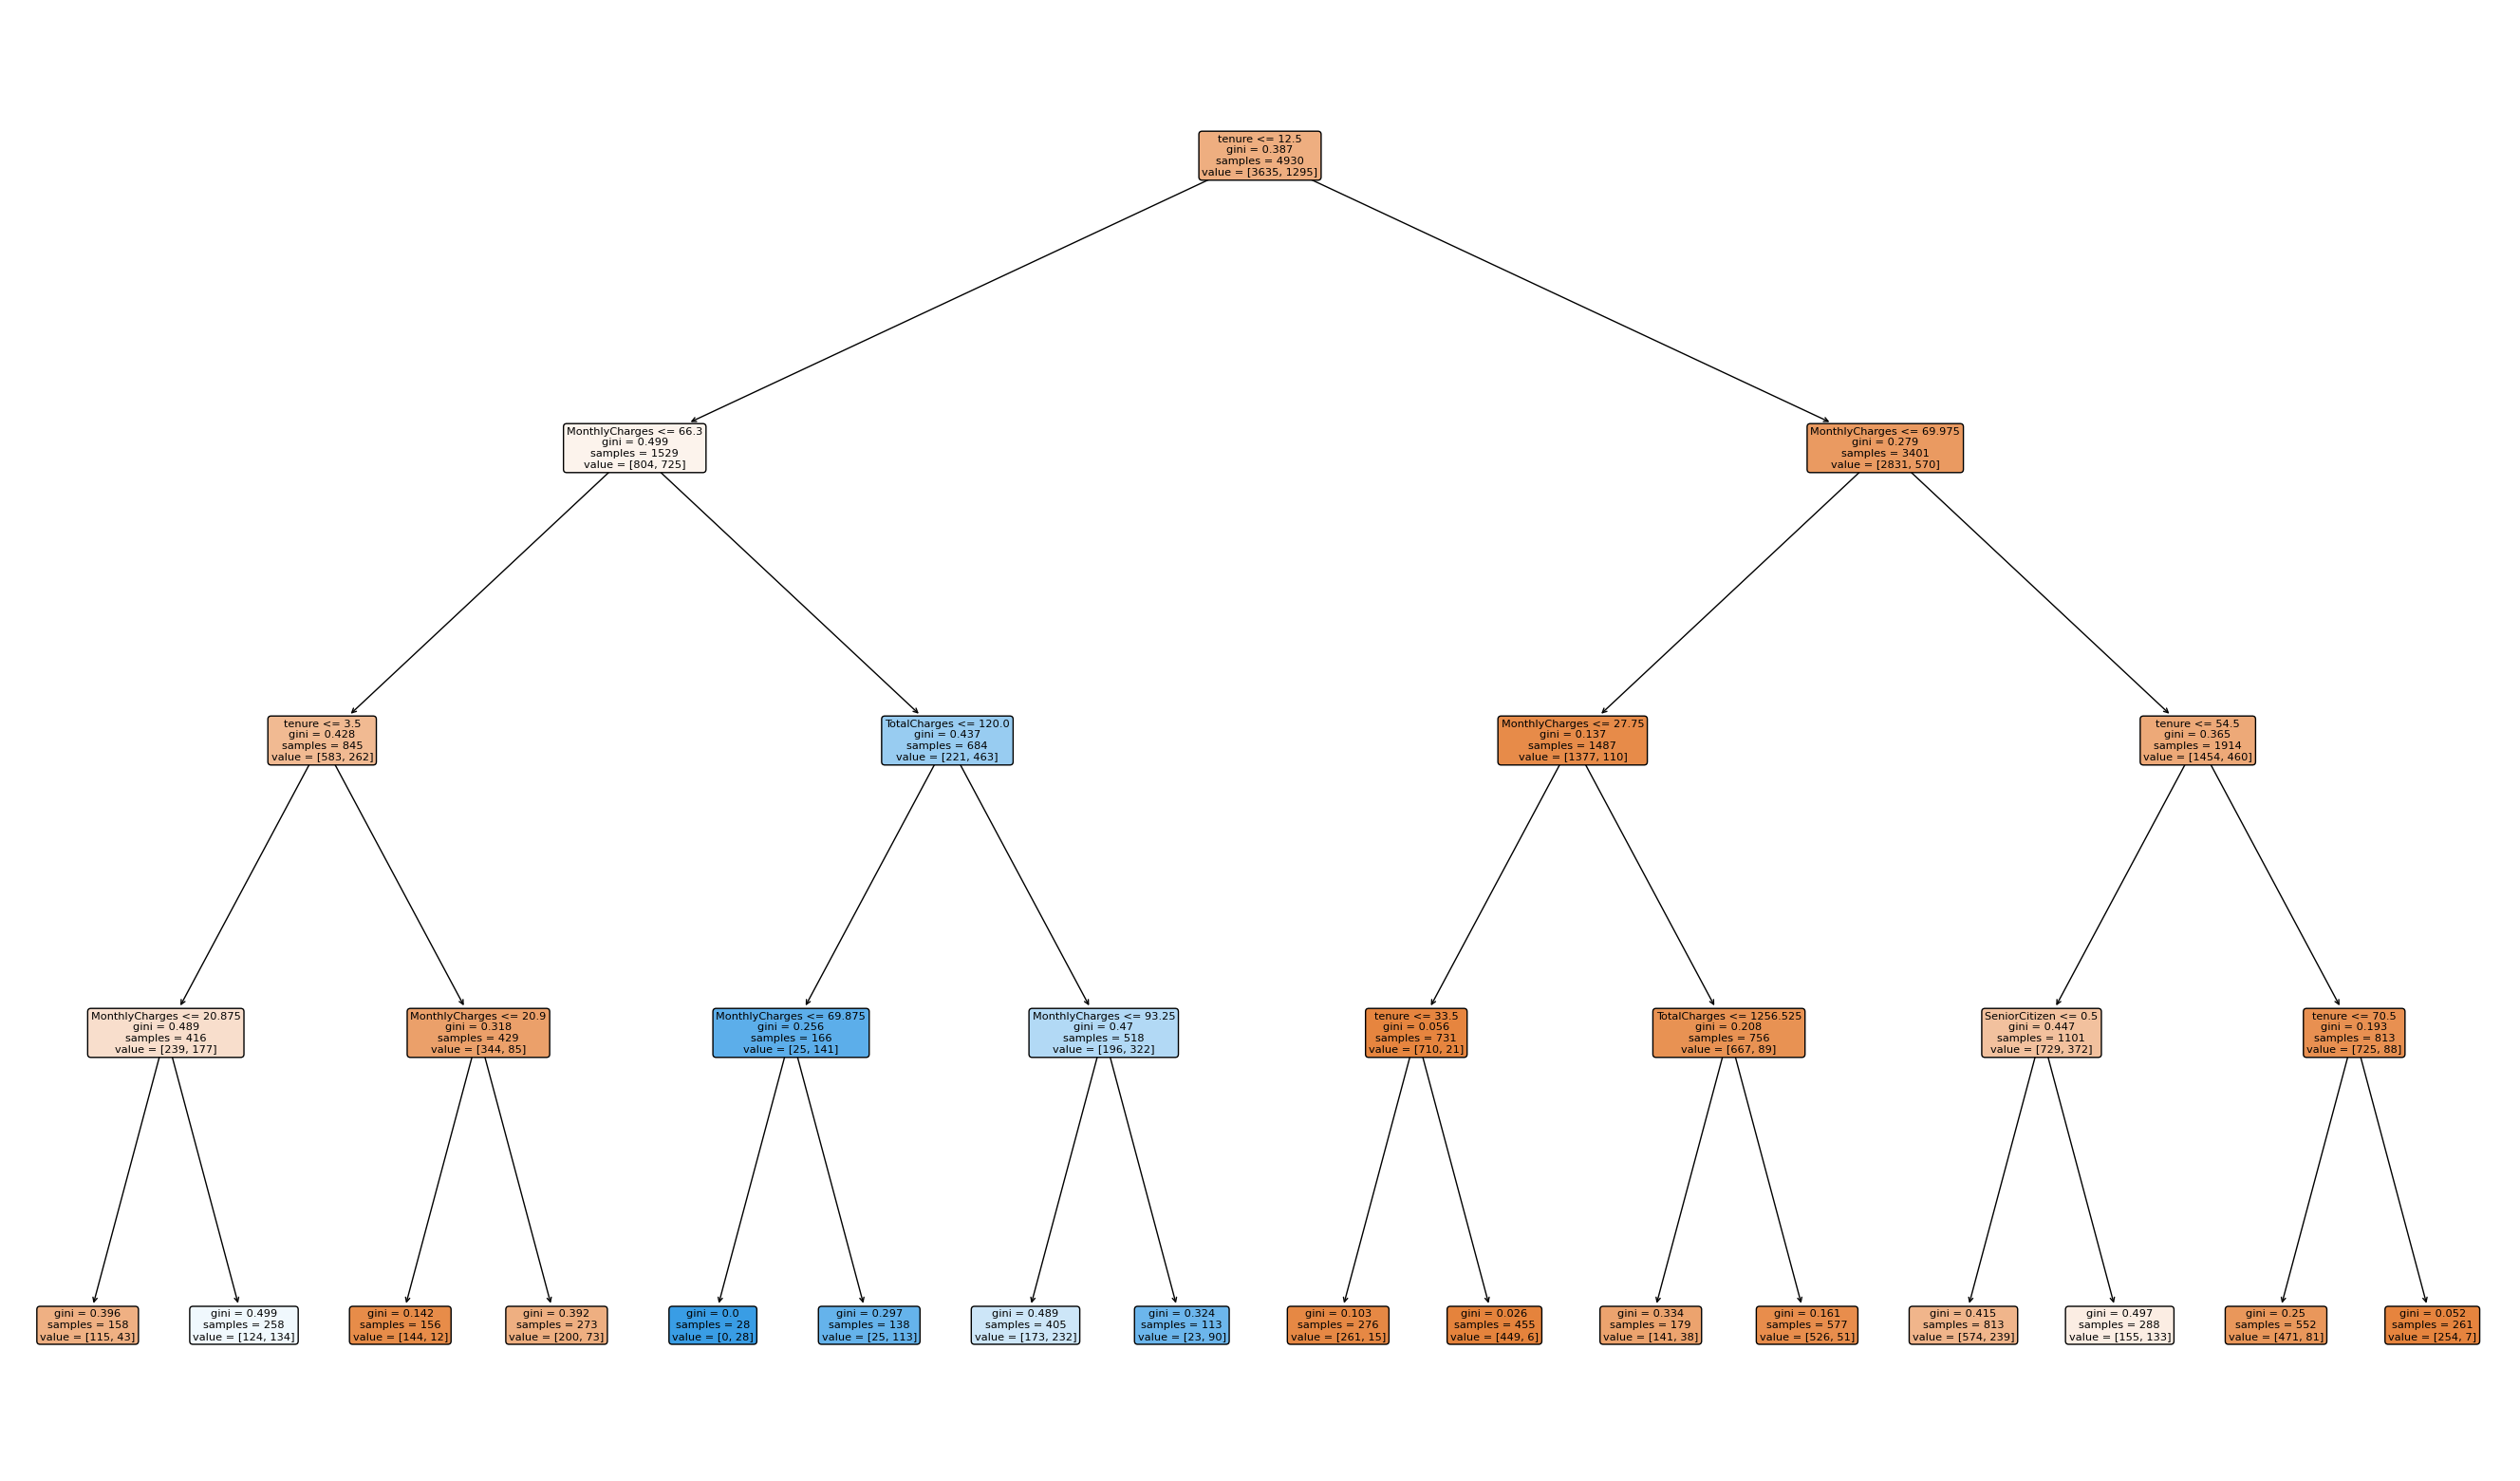

'for depth= 5'

,Error_metric,Train,Test
0,Accuracy,0.796755,0.784193
1,Precision,0.664422,0.648990
2,Recall,0.457143,0.447735


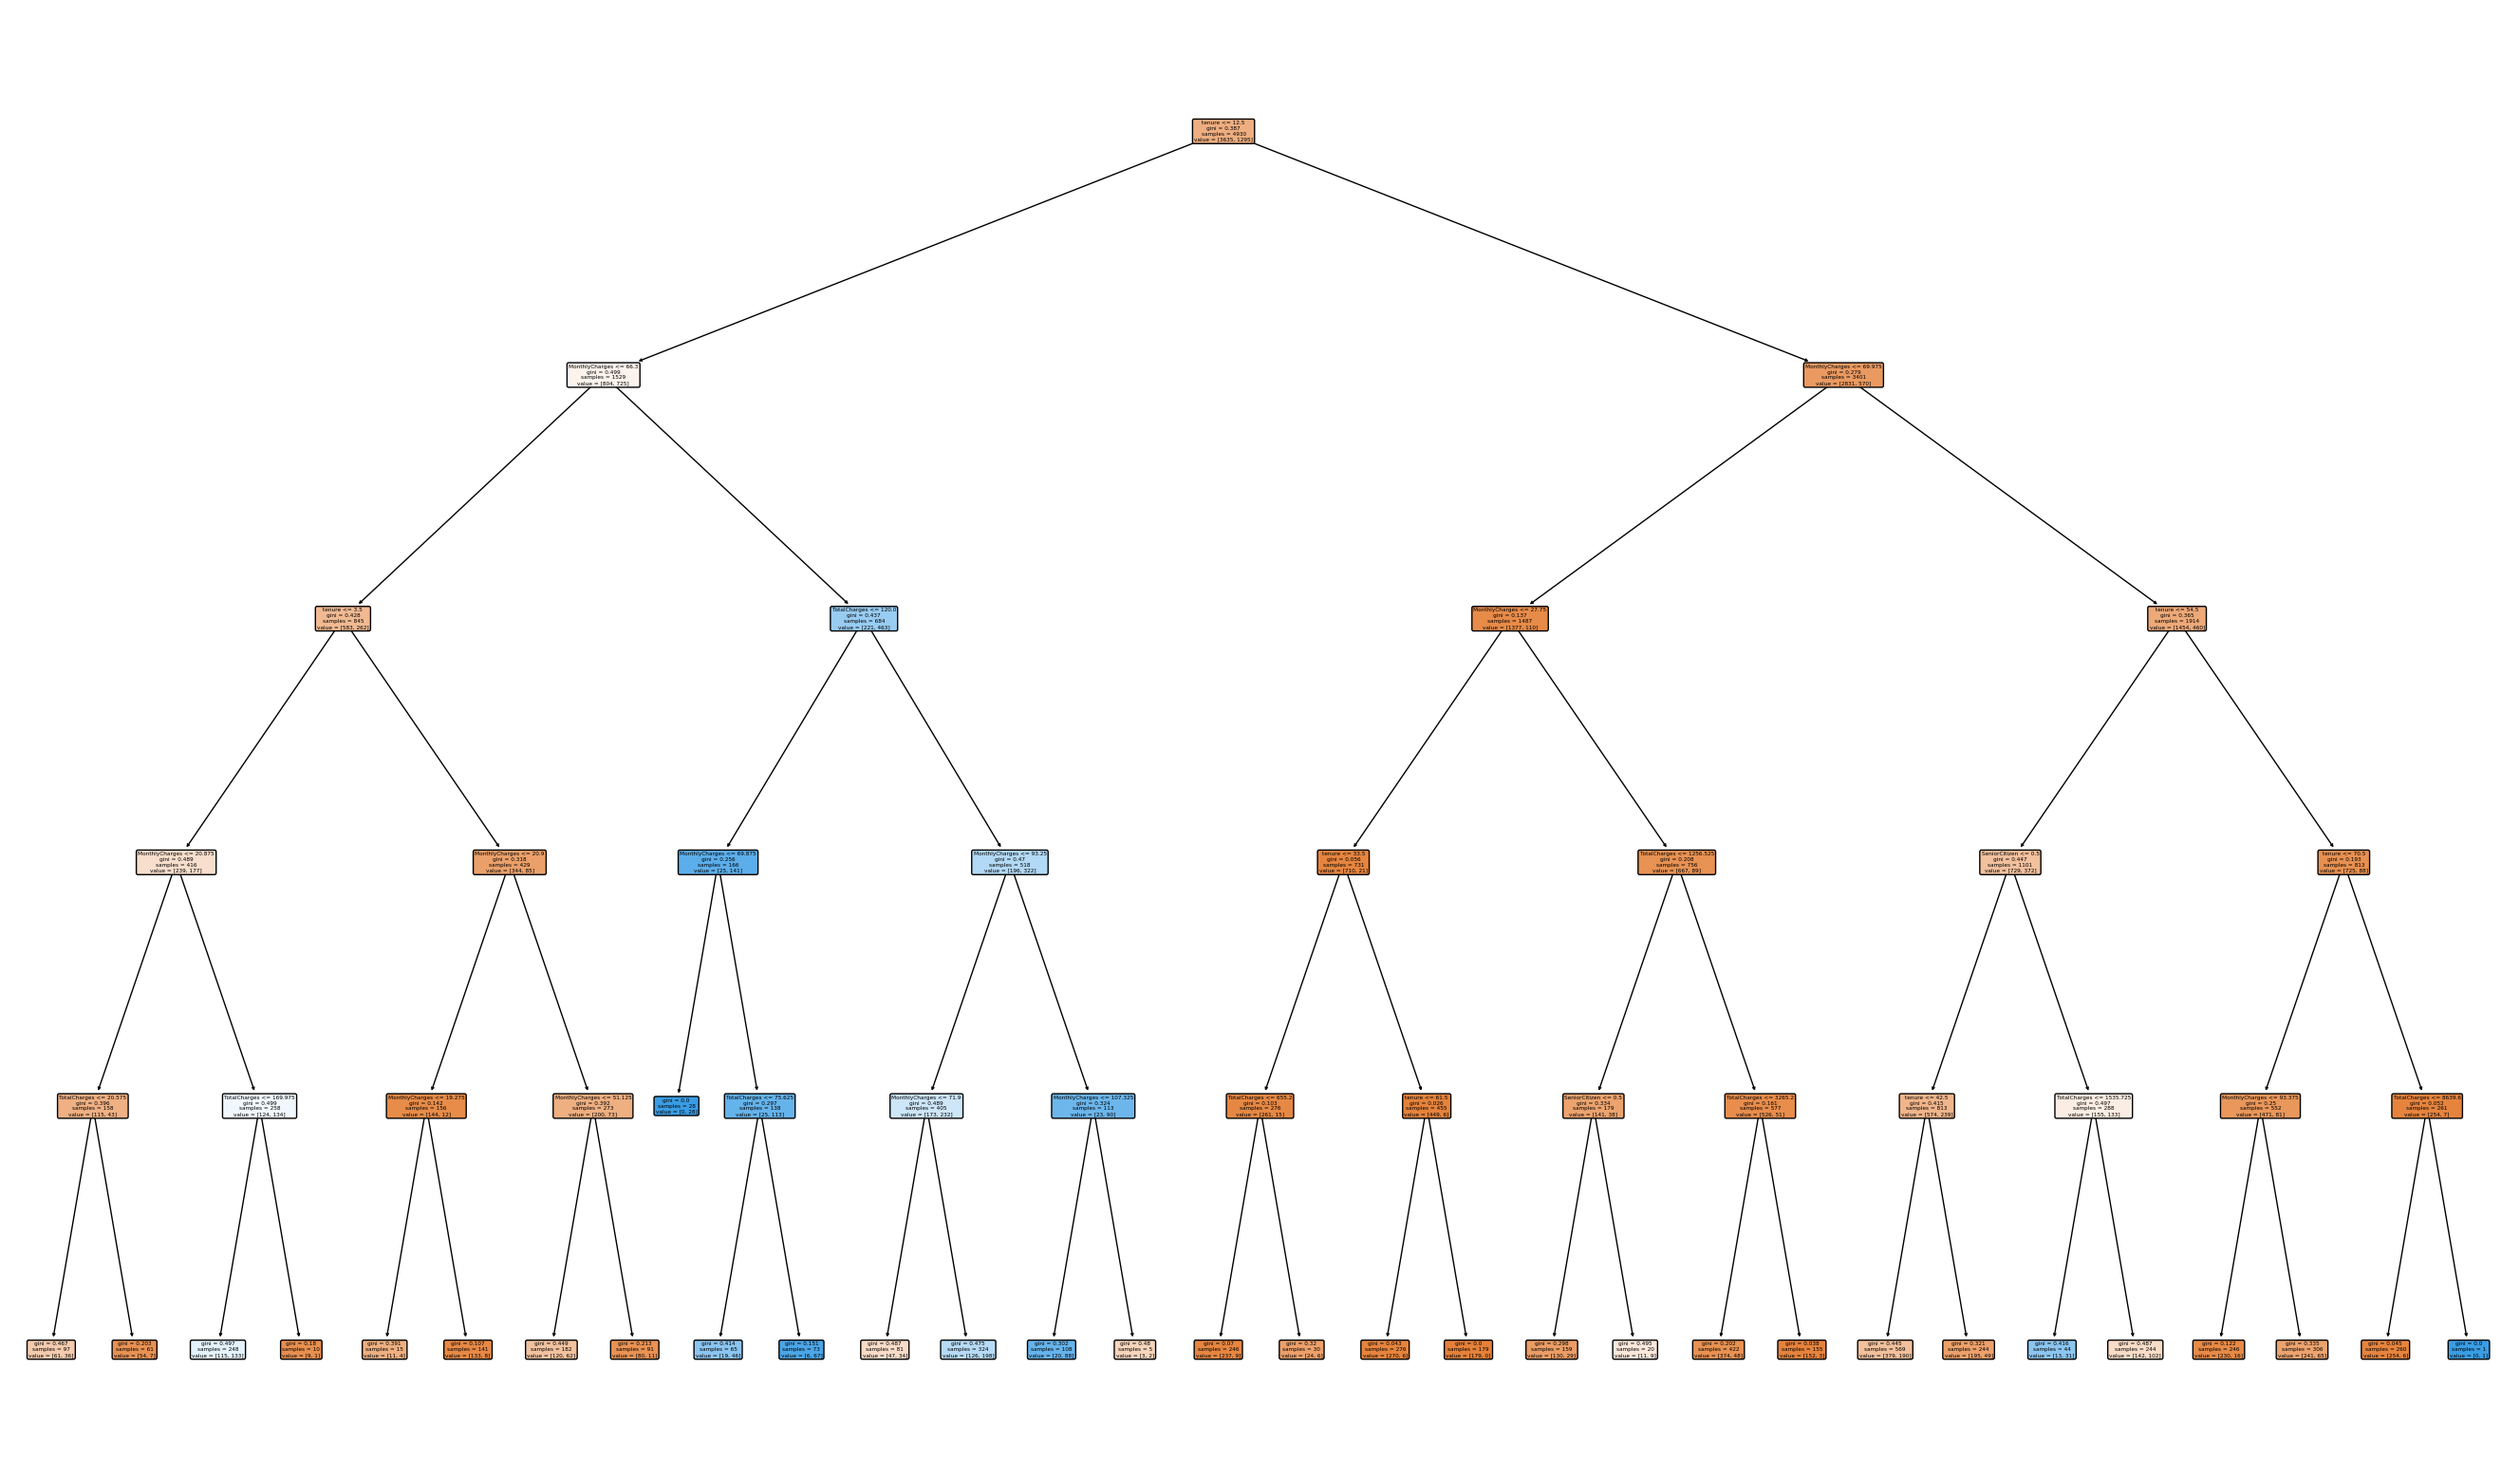

'for depth= 6'

,Error_metric,Train,Test
0,Accuracy,0.802028,0.778514
1,Precision,0.662258,0.622685
2,Recall,0.502703,0.468641


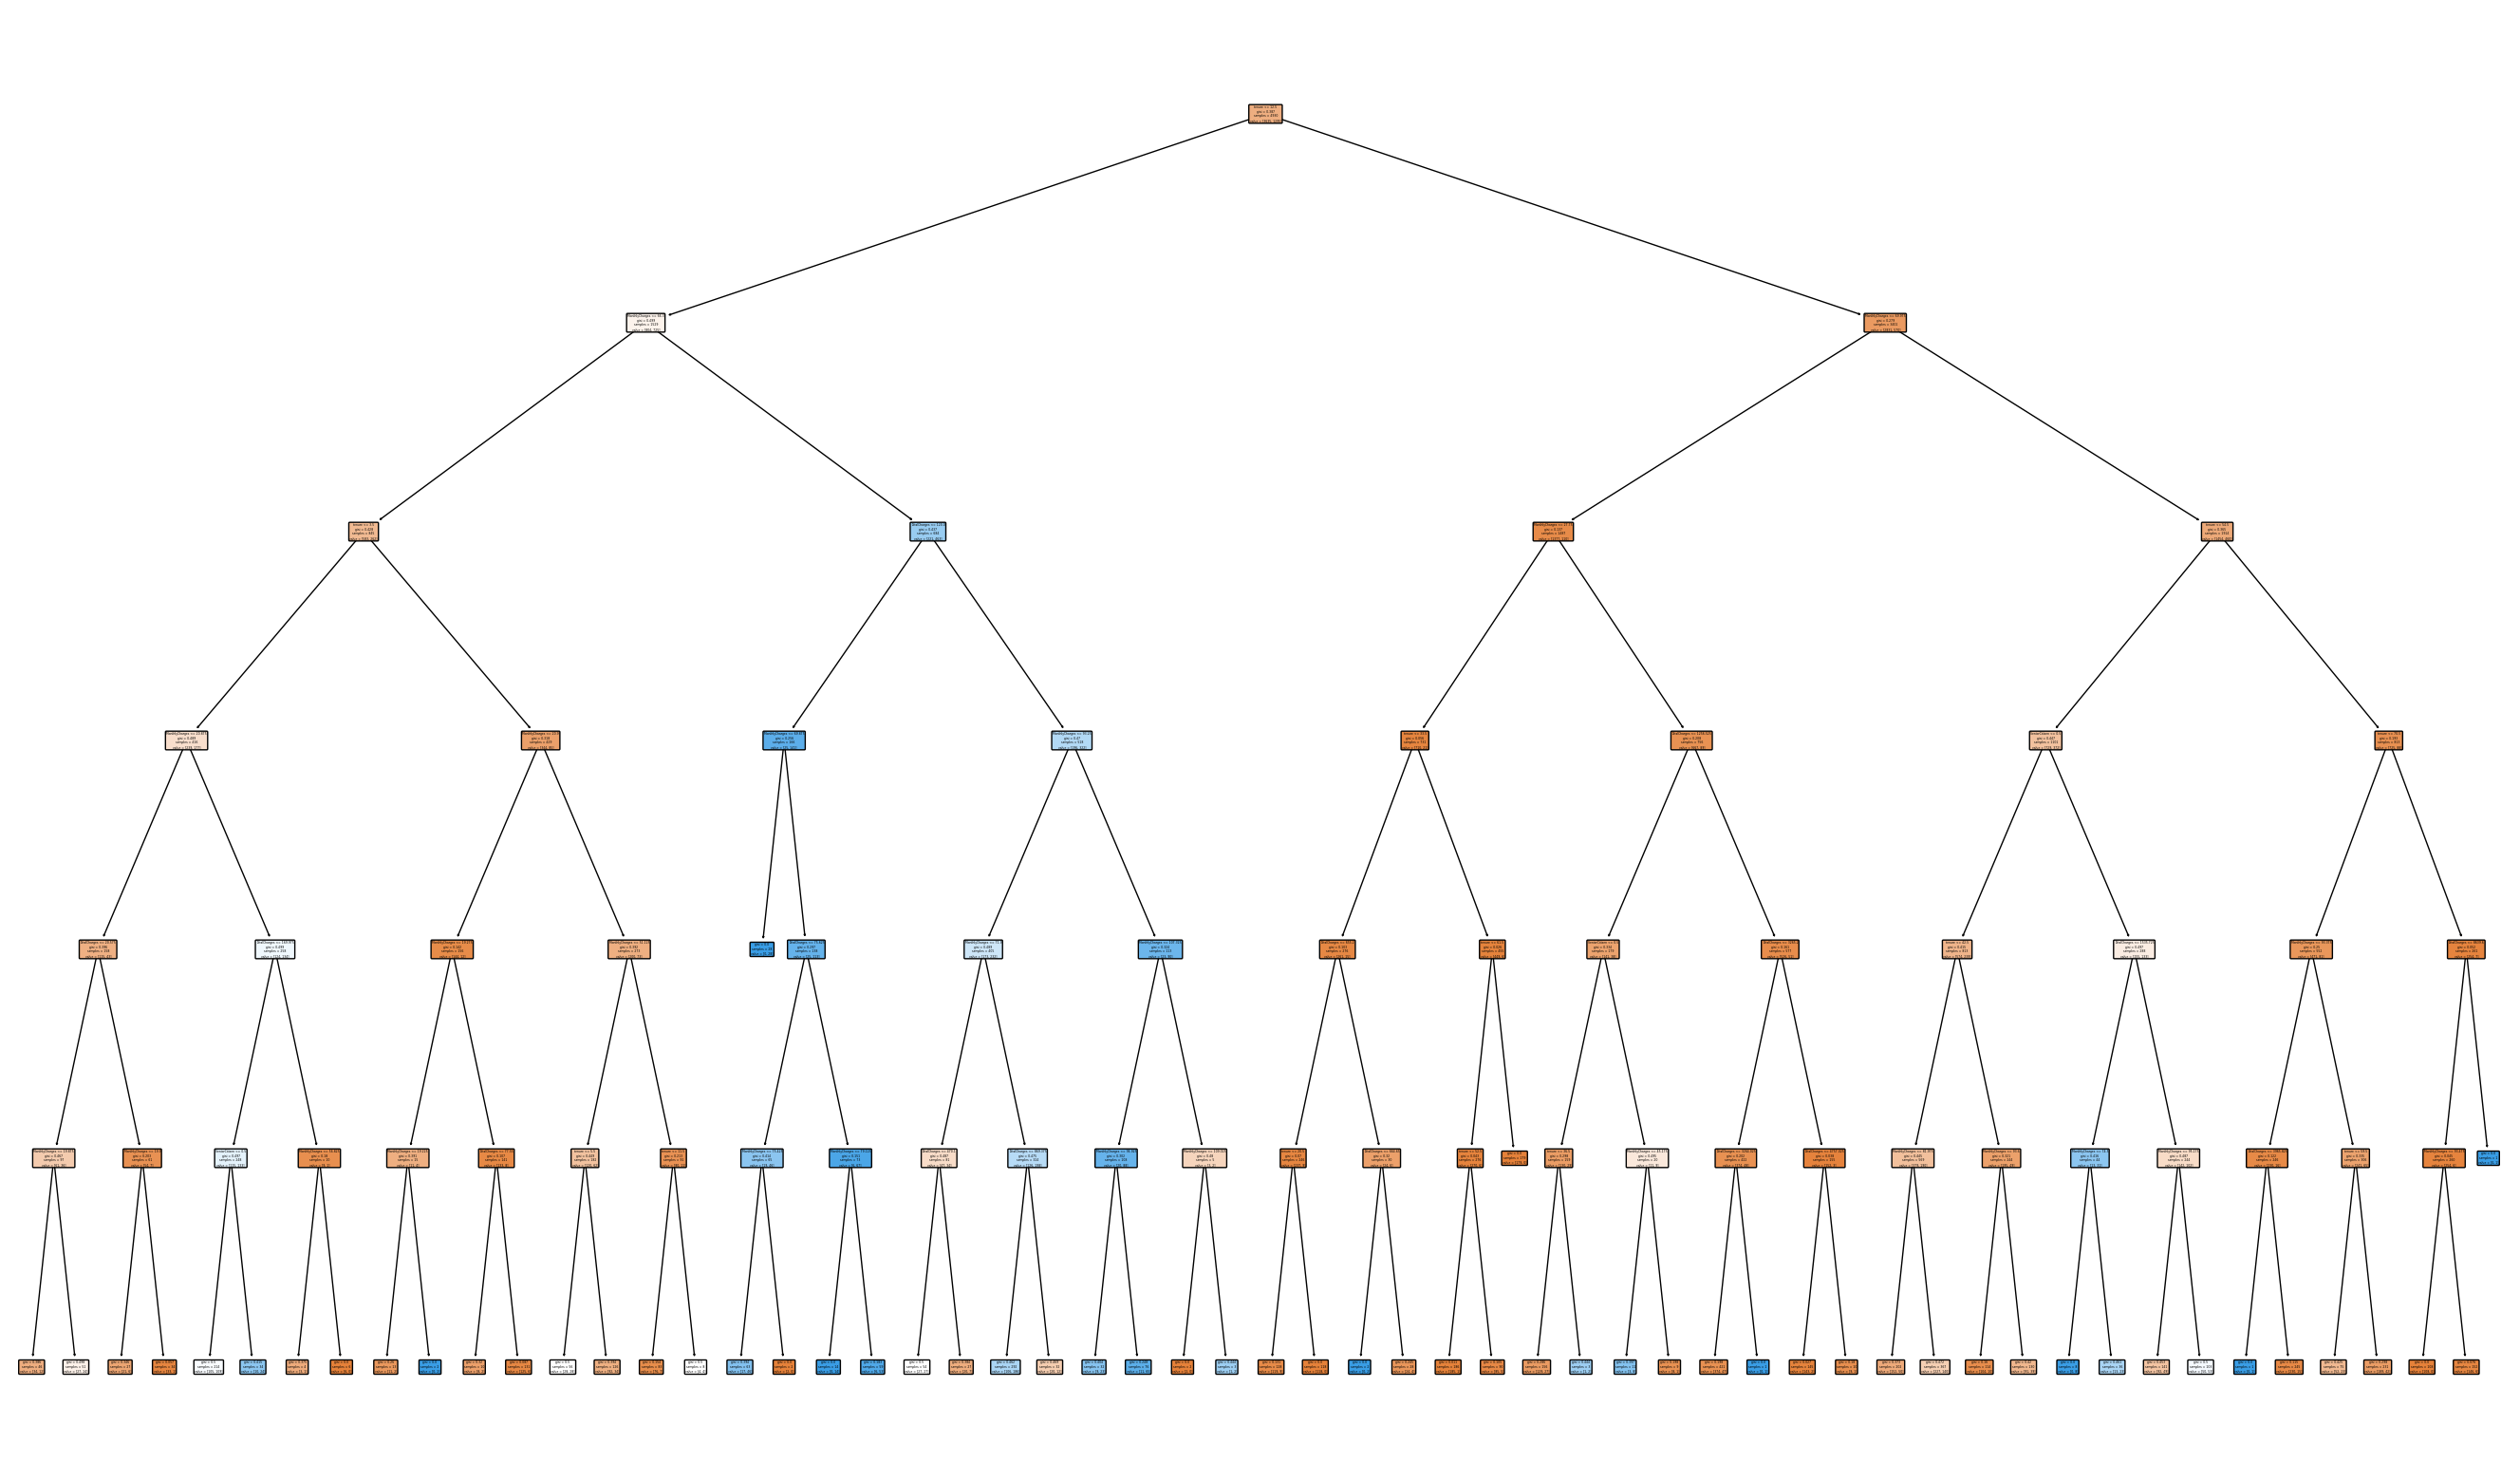

'for depth= 7'

,Error_metric,Train,Test
0,Accuracy,0.813590,0.769522
1,Precision,0.711712,0.610687
2,Recall,0.488031,0.418118


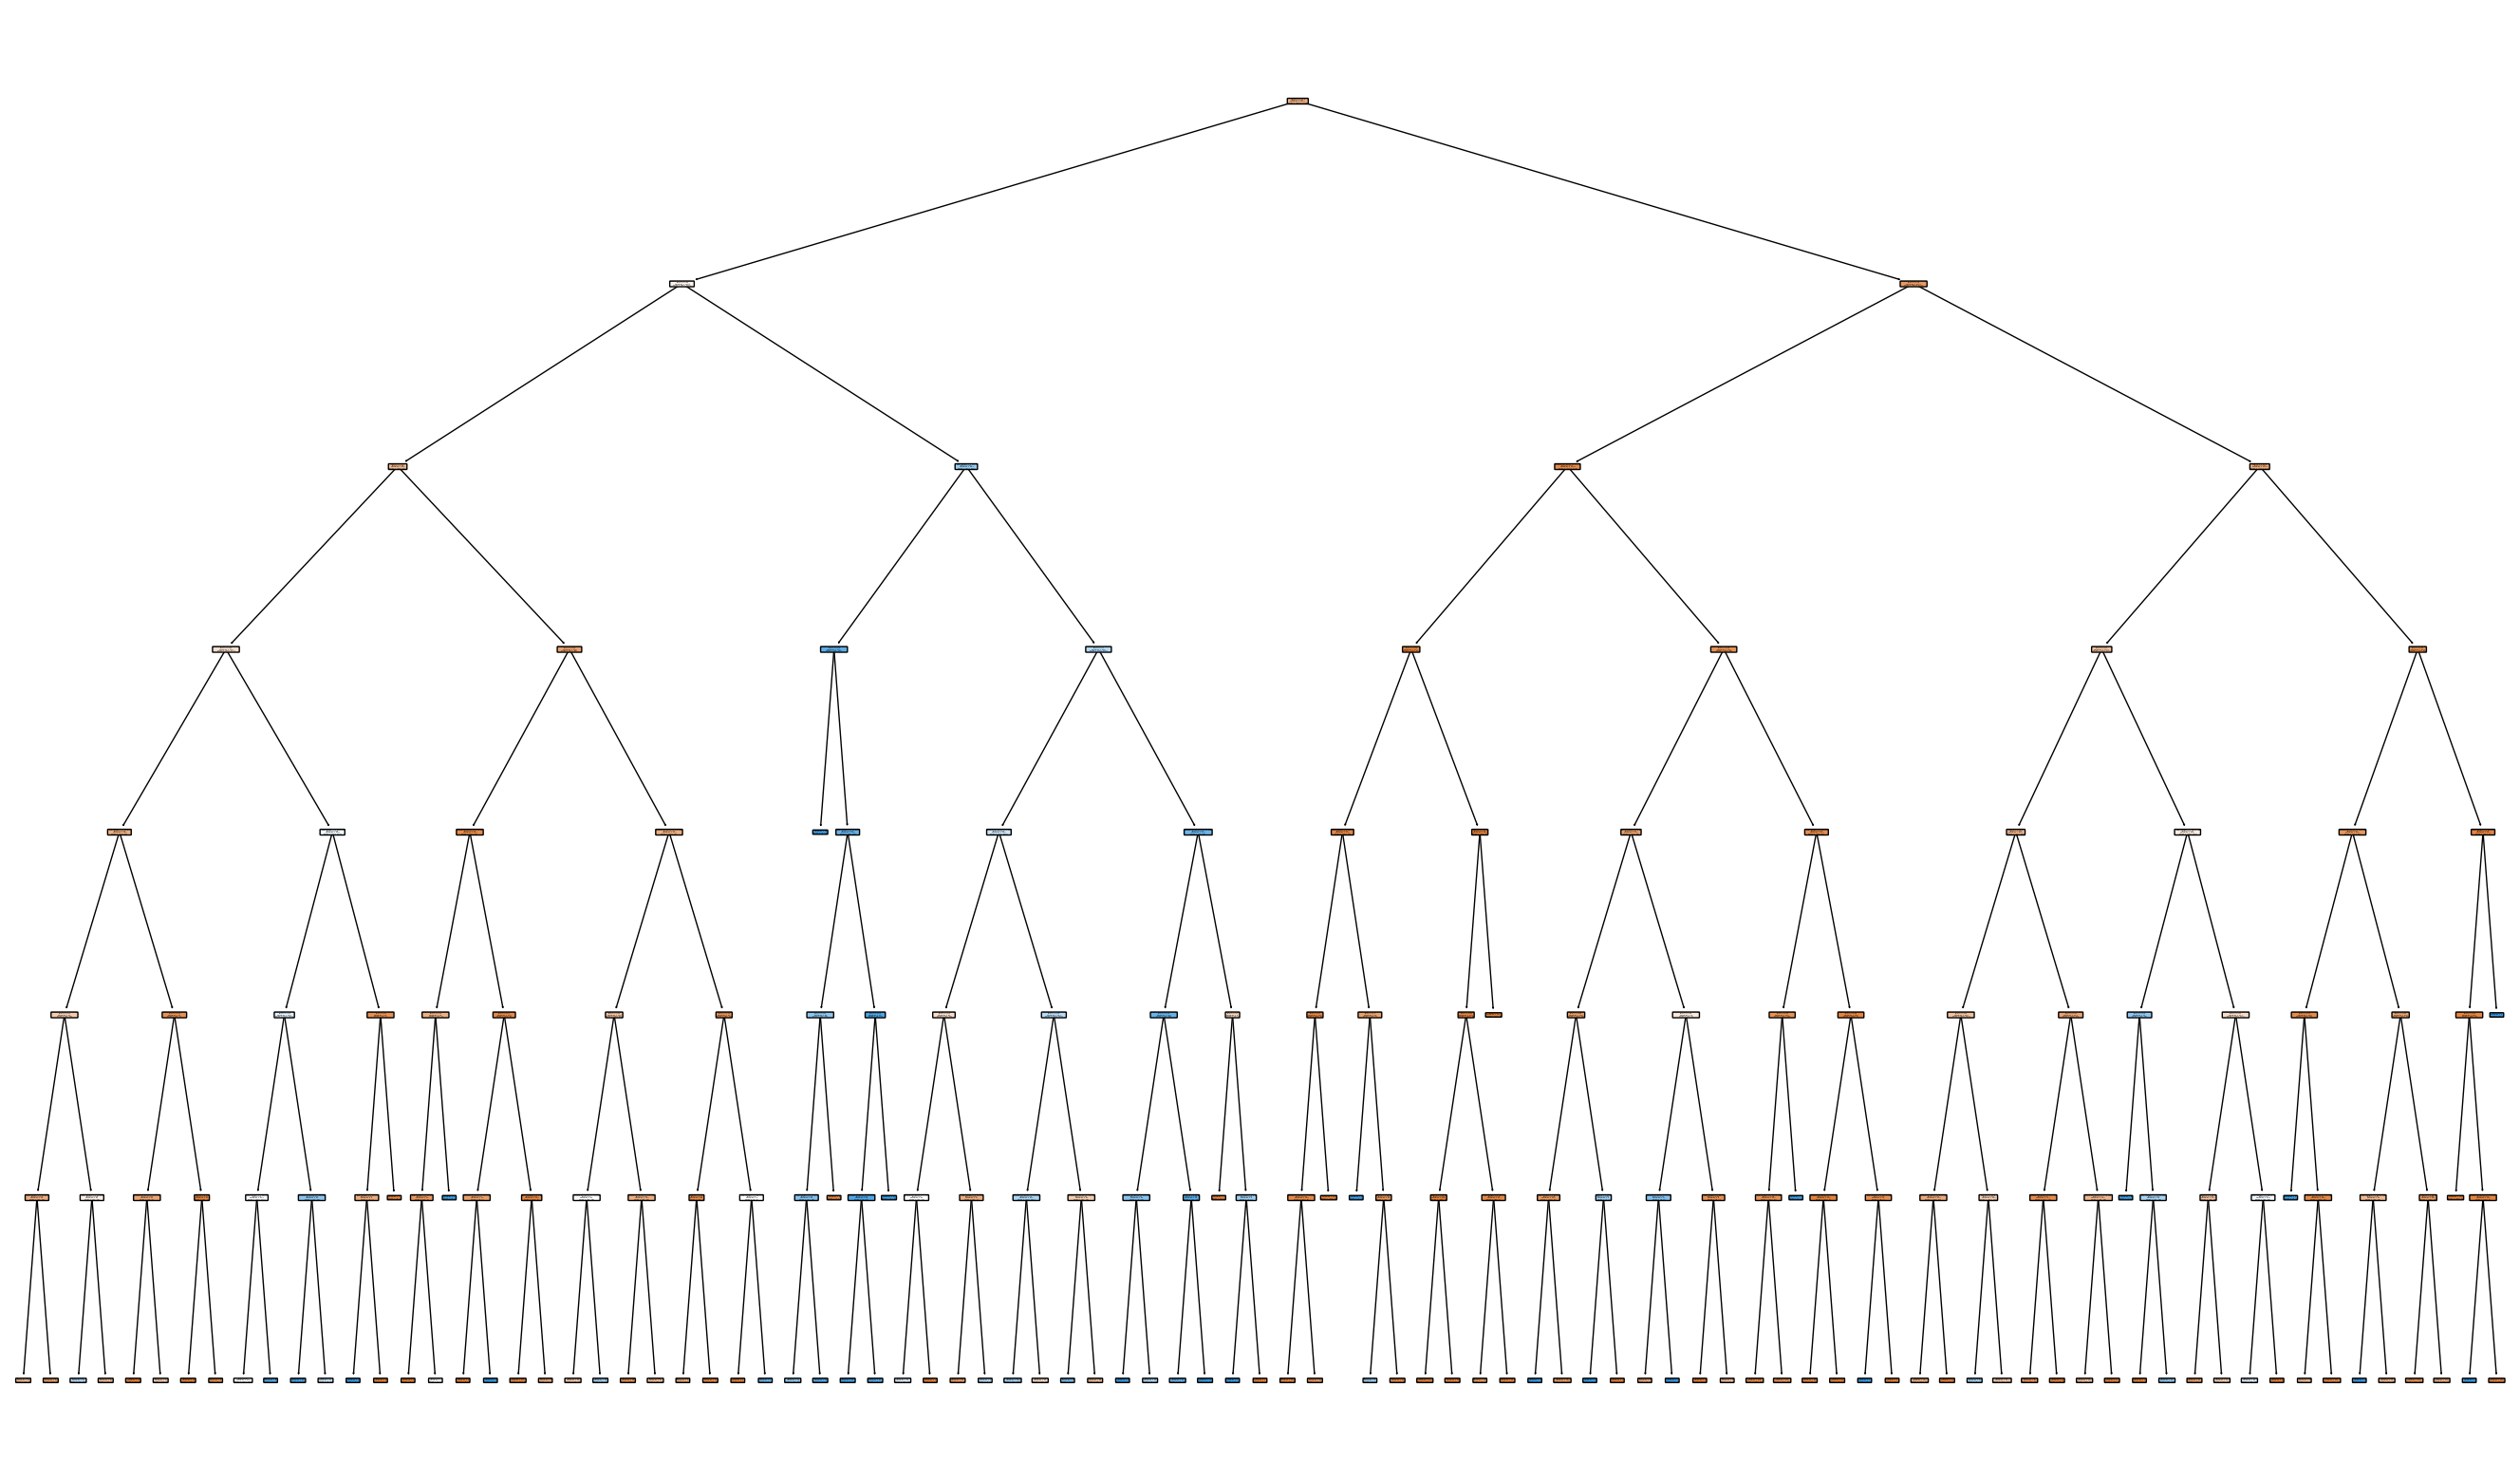

'for depth= 8'

,Error_metric,Train,Test
0,Accuracy,0.825152,0.756744
1,Precision,0.684569,0.556604
2,Recall,0.620077,0.513937


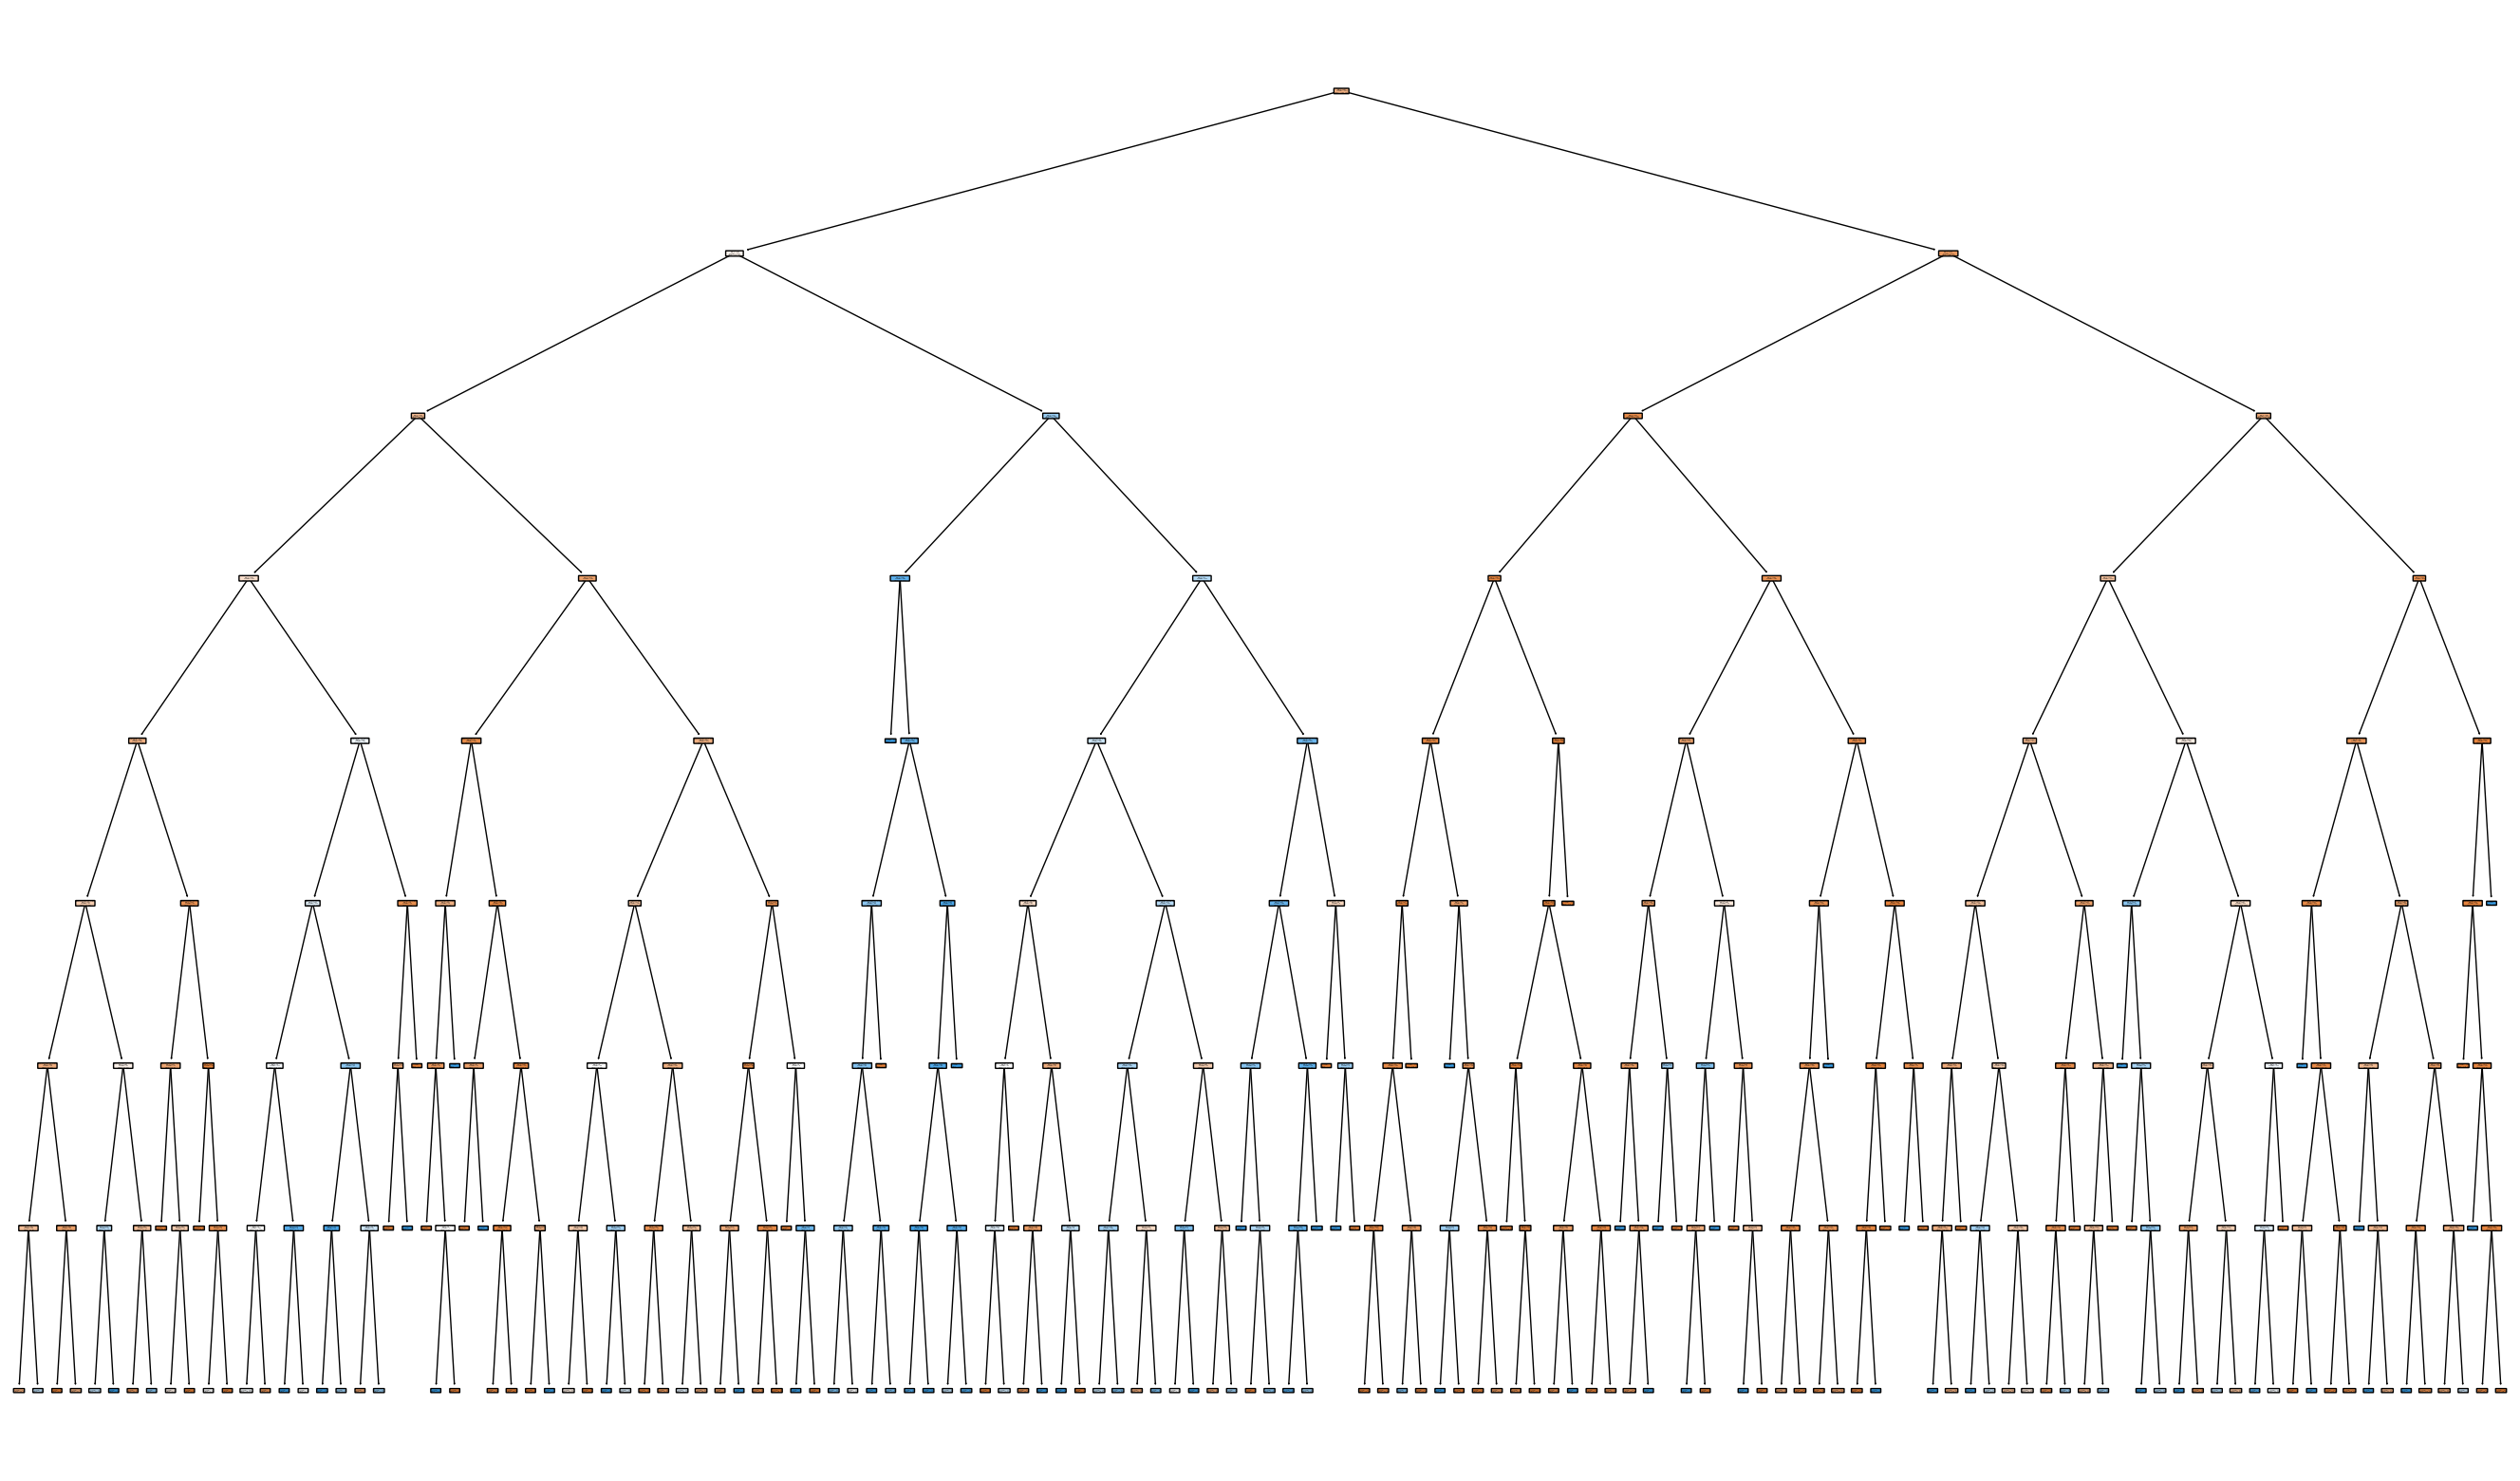

'for depth= 9'

,Error_metric,Train,Test
0,Accuracy,0.838134,0.770942
1,Precision,0.767492,0.611940
2,Recall,0.550579,0.428571


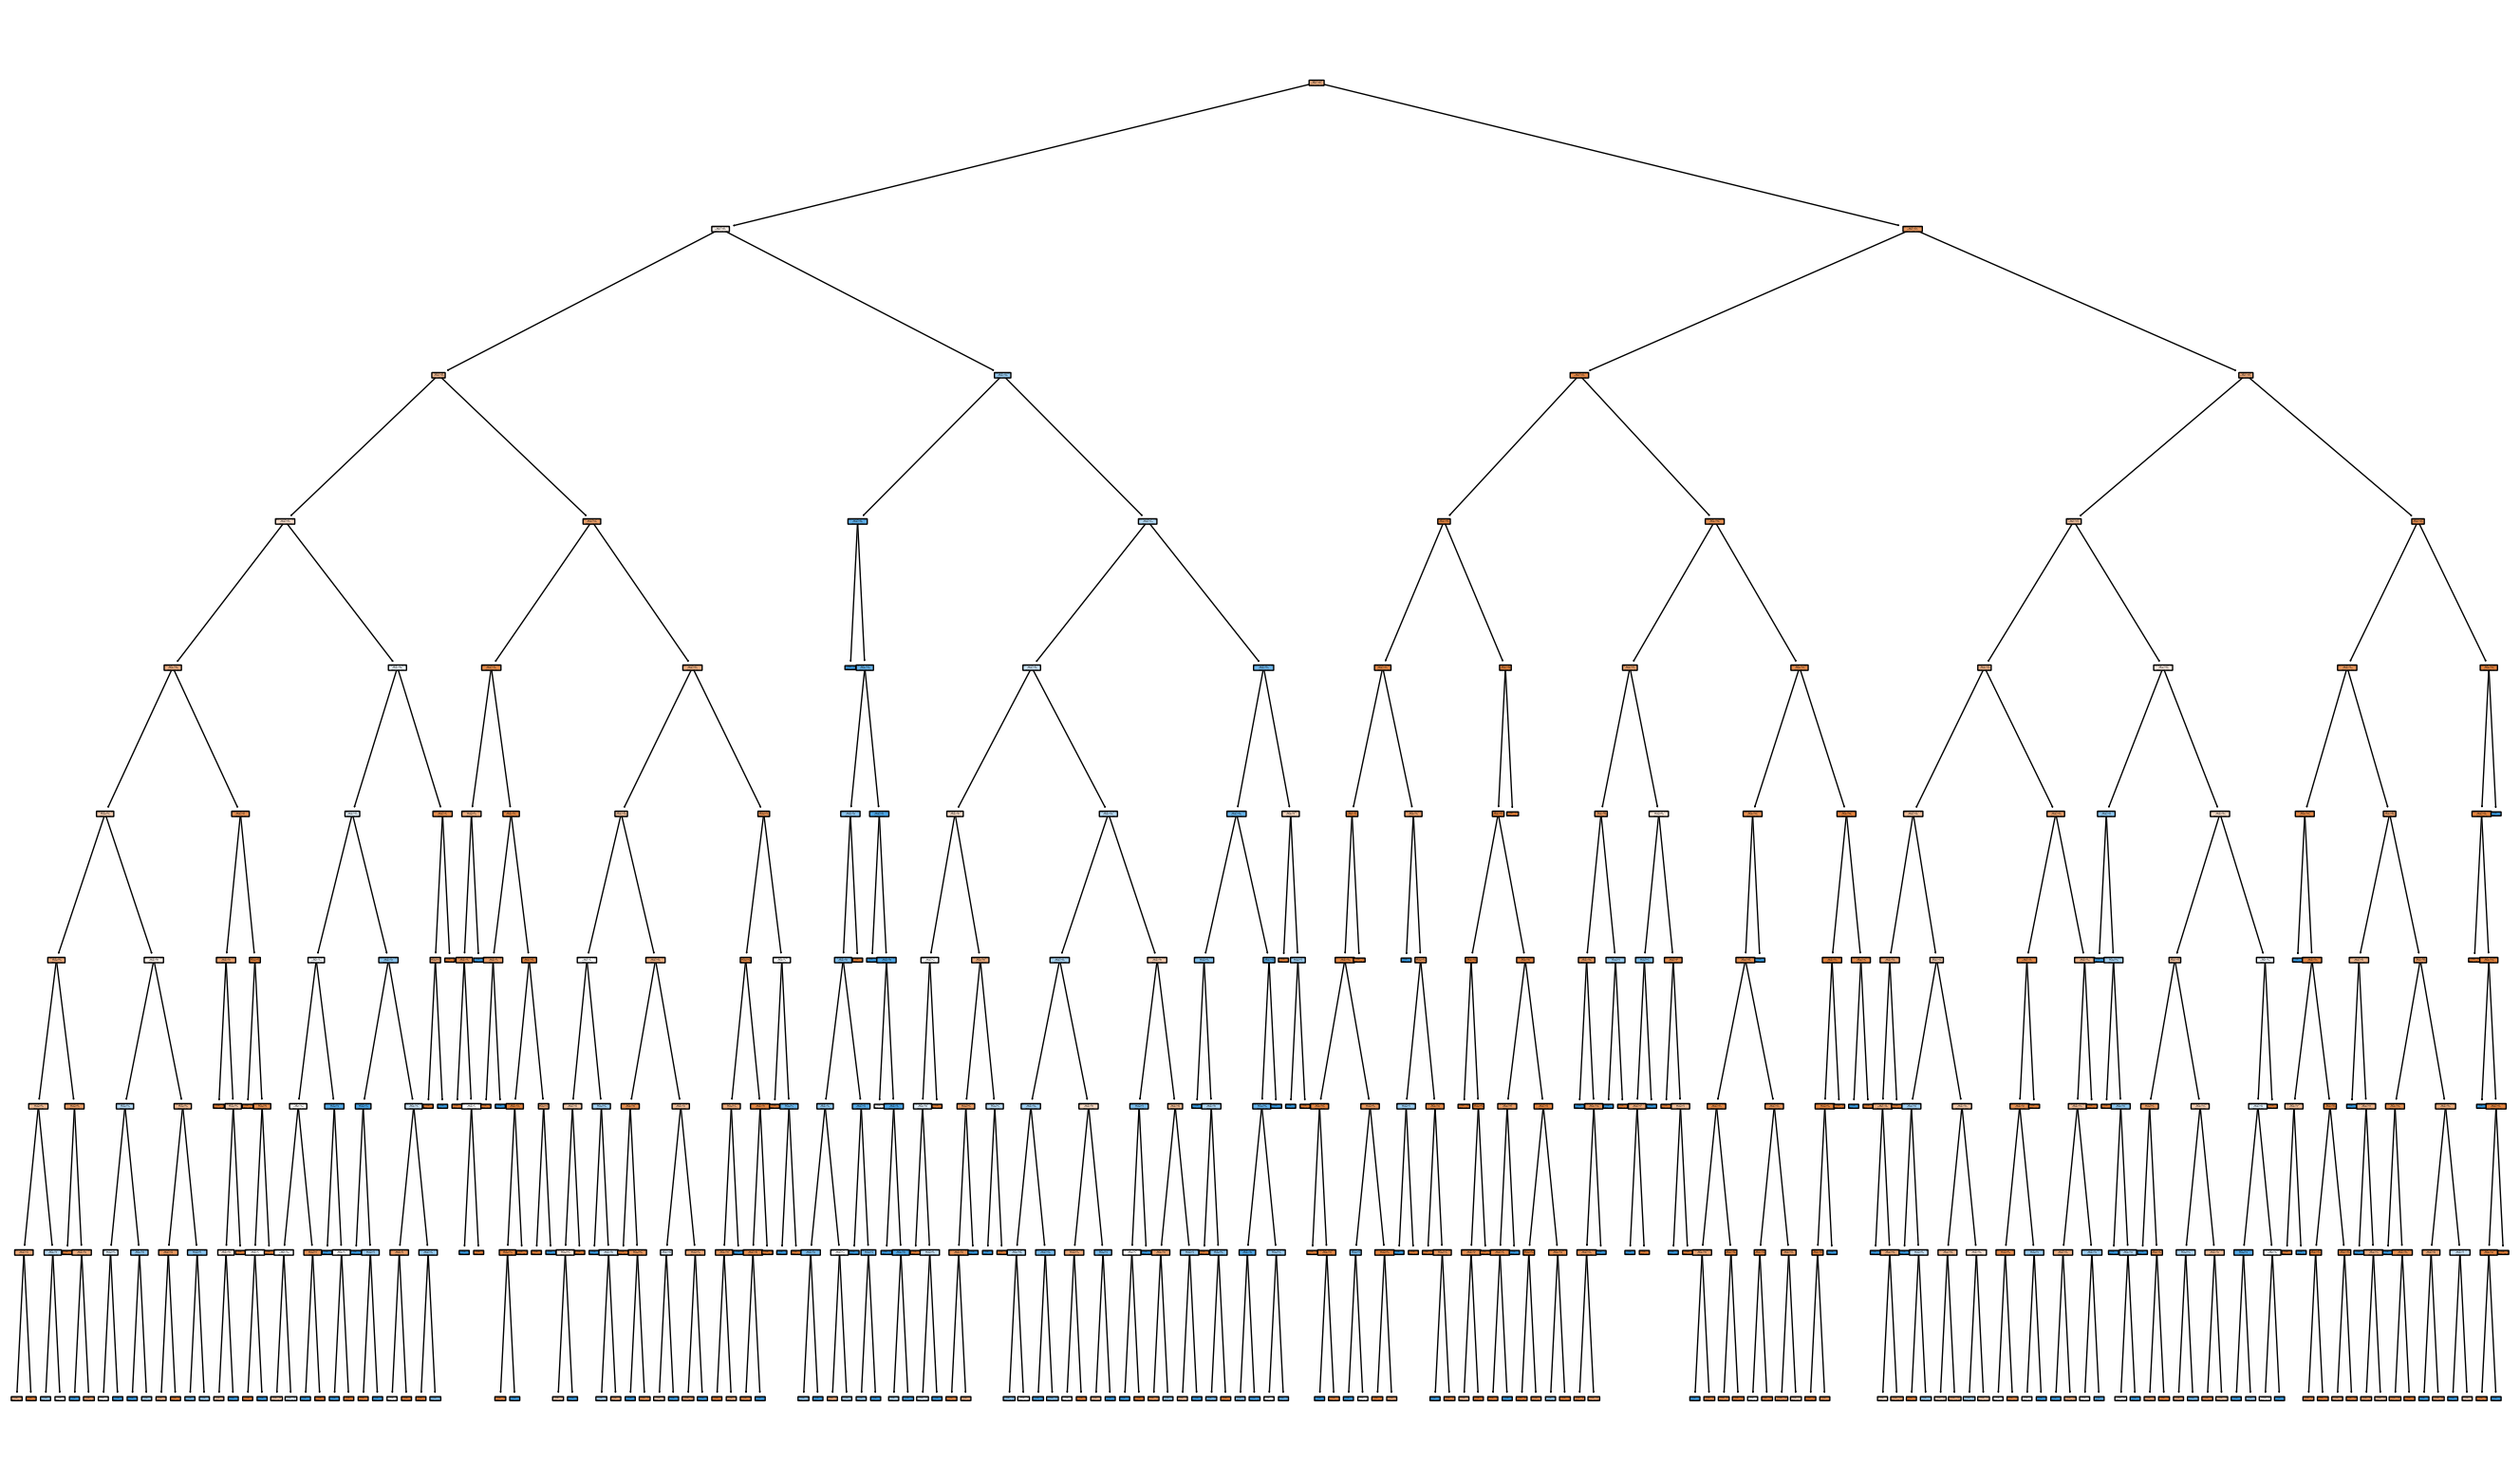

In [17]:

for i in range (1,10):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
    
    display(f'for depth= {i}',  performance_df)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
    plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
    plt.show() 



<BarContainer object of 4 artists>

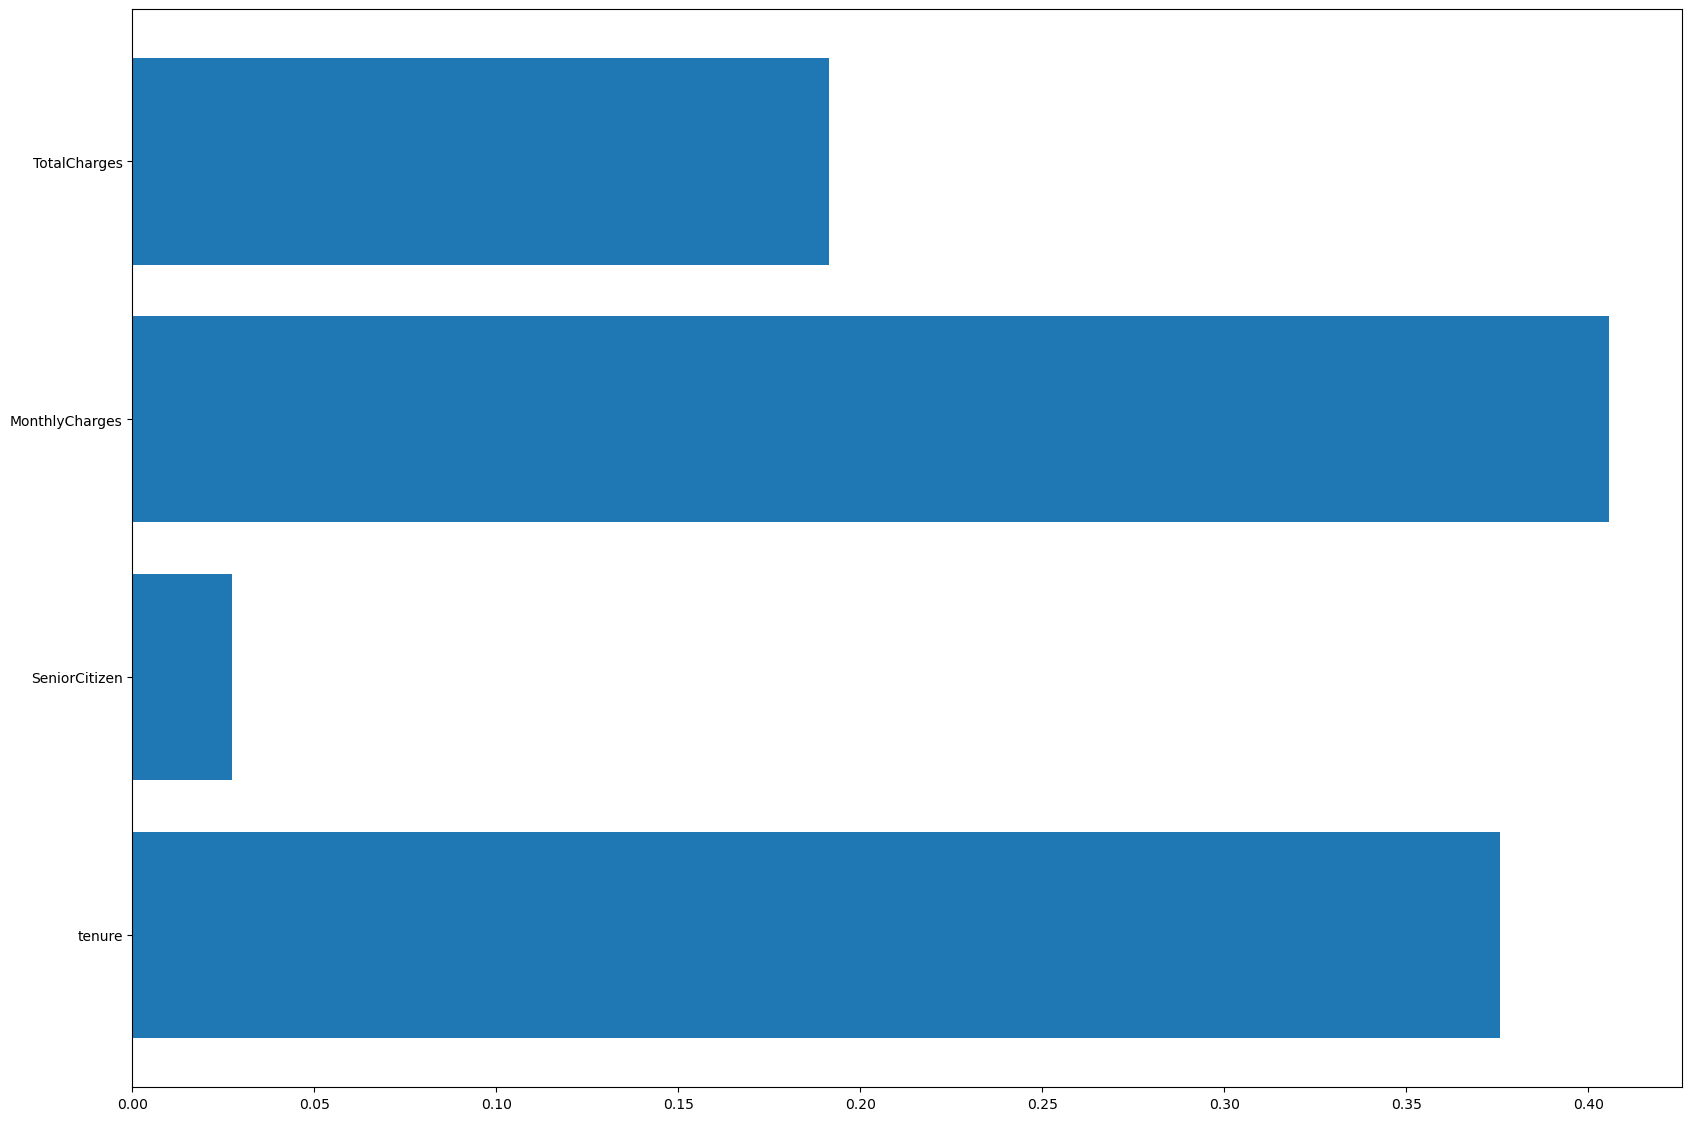

In [18]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)